In [51]:
from comet import download_model, load_from_checkpoint
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
# model_path = download_model("Unbabel/wmt22-cometkiwi-da", saving_directory="models/cometkiwi_wmt22") # for reference-free evaluation
model_path = "models/cometkiwi_wmt22/models--Unbabel--wmt22-cometkiwi-da/snapshots/265631cbbaf0740fc94aee7901930817dcc853c7/checkpoints/model.ckpt"

Fetching 5 files: 100%|██████████| 5/5 [00:00<00:00, 18.63it/s]


In [38]:
print(model_path)

models/cometkiwi_wmt22\models--Unbabel--wmt22-cometkiwi-da\snapshots\265631cbbaf0740fc94aee7901930817dcc853c7\checkpoints\model.ckpt


In [39]:
model = load_from_checkpoint(model_path)

Lightning automatically upgraded your loaded checkpoint from v1.8.2 to v2.5.0.post0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint c:\Users\antoi\OneDrive\Documents\UofT Fall 2024\ESC499 - Thesis\github\translation_thesis\translation_analysis\analysis1\models\cometkiwi_wmt22\models--Unbabel--wmt22-cometkiwi-da\snapshots\265631cbbaf0740fc94aee7901930817dcc853c7\checkpoints\model.ckpt`
c:\Users\antoi\OneDrive\Documents\UofT Fall 2024\ESC499 - Thesis\github\translation_thesis\venv\lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\antoi\.cache\huggingface\hub\models--microsoft--infoxlm-large. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING

In [ ]:
def read_csv_to_numpy(csv_file_path):
    try:
        # Read the CSV with utf-8-sig encoding to handle the BOM
        df = pd.read_csv(csv_file_path, encoding='utf-8-sig')
        
        # Convert the DataFrame to a NumPy array
        numpy_array = df.to_numpy()
        return numpy_array
    except FileNotFoundError:
        print(f"Error: The file '{csv_file_path}' does not exist.")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Example usage
csv_file_path = '../../data_collection_app/app_latest_database/translation.csv'
numpy_array = read_csv_to_numpy(csv_file_path)

# Print the NumPy array
if numpy_array is not None:
    print(numpy_array[:10])


[[1 'eng_to_spa' 'You run' 'Tu corres' 'Tú corres.' 2
  '2024-11-23 19:01:39']
 [2 'eng_to_spa' 'Yes' 'Sí' 'Sí' 3 '2024-11-23 19:01:50']
 [3 'spa_to_eng' 'tu esposa te regañaba por no recoger a sus niños'
  'Your wife scolded you for not picking up your children'
  'Your wife would scold you for not picking up her kids.' 1
  '2024-11-23 19:38:39']
 [4 'spa_to_eng' 'Obtén un batidor. Bate las fresas.'
  'Get a mixer. Blend the strawberries.'
  'Get a whisk. Whisk the strawberries.' 1 '2024-11-23 19:39:28']
 [7 'eng_to_spa' 'Barcelona beat Real Madrid'
  'El Barcelona venció al Real Madrid'
  'El Barcelona venció al Real Madrid.' 3 '2024-11-23 19:42:17']
 [8 'spa_to_eng' 'un callejón' 'an alley' 'a alleyway' 1
  '2024-11-24 01:25:15']
 [9 'eng_to_spa' 'you run' 'tu corres' 'tú corres' 2
  '2024-11-26 21:29:20']
 [10 'eng_to_spa' 'Hello how are you?' '¿Hola, cómo estás?'
  'Hola, ¿cómo estás?' 3 '2024-11-26 21:29:53']
 [11 'eng_to_spa' 'my head hurts' 'Me duele la cabeza'
  'Me duele la c

In [41]:
print(numpy_array[0][2])
print(numpy_array[0][3])
print(numpy_array[0][4])

You run
Tu corres
Tú corres.


In [42]:
data = [
    {
        "src": numpy_array[0][2],
        "mt": numpy_array[0][3],
    },
    {
        "src": numpy_array[0][2],
        "mt": numpy_array[0][4],
    }
]
# Call predict method:
model_output = model.predict(data, batch_size=8, gpus=0) # quite rapid

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Predicting DataLoader 0: 100%|██████████| 1/1 [00:05<00:00,  5.85s/it]


In [43]:
print(model_output)

Prediction([('scores', [0.6030316352844238, 0.6196182370185852]), ('system_score', 0.6113249361515045)])


In [44]:
outputs = []

# Iterate over the rows in numpy_array
for i in range(len(numpy_array)):
    # Prepare the data for prediction (src, mt) pairs
    data = [
        {
            "src": numpy_array[i][2],  # Source sentence
            "mt": numpy_array[i][3]   # Machine translation
        },
        {
            "src": numpy_array[i][2],  # Source sentence
            "mt": numpy_array[i][4]   # Another machine translation for comparison
        }
    ]
    
    # Call the predict method
    model_output = model.predict(data, batch_size=8, gpus=0)
    outputs.append(model_output)  # Save the prediction result

outputs_array = np.array(outputs)


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00,  1.54it/s]
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00,  1.54it/s]
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: 

In [60]:
print(outputs_array [:10])

[Prediction([('scores', [0.6030316352844238, 0.6196182370185852]), ('system_score', 0.6113249361515045)])
 Prediction([('scores', [0.8501364588737488, 0.8501364588737488]), ('system_score', 0.8501364588737488)])
 Prediction([('scores', [0.8584273457527161, 0.8574460744857788]), ('system_score', 0.8579367101192474)])
 Prediction([('scores', [0.8502982258796692, 0.7755235433578491]), ('system_score', 0.8129108846187592)])
 Prediction([('scores', [0.8861448168754578, 0.8943485617637634]), ('system_score', 0.8902466893196106)])
 Prediction([('scores', [0.8204036355018616, 0.842363178730011]), ('system_score', 0.8313834071159363)])
 Prediction([('scores', [0.5344700217247009, 0.6465171575546265]), ('system_score', 0.5904935896396637)])
 Prediction([('scores', [0.8803060054779053, 0.8838239908218384]), ('system_score', 0.8820649981498718)])
 Prediction([('scores', [0.8813906311988831, 0.8786202669143677]), ('system_score', 0.8800054490566254)])
 Prediction([('scores', [0.42632997035980225, 0

In [47]:
# Save the inputs and outputs to separate .npy files
np.save('checkpoints/analysis_app_data/inputs.npy', numpy_array)
np.save('checkpoints/analysis_app_data/outputs.npy', outputs_array)

In [50]:
print(outputs_array[0].scores)

[0.6030316352844238, 0.6196182370185852]


In [53]:
print(numpy_array[0][5])

2


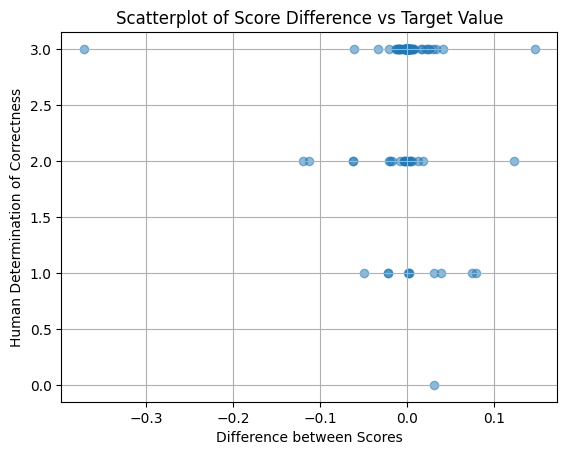

In [57]:
differences = []
target_values = []

# Iterate through the numpy_array and model predictions
for i in range(len(numpy_array)):
    score_1 = outputs_array[i].scores[0] # score GoogleTranslate
    score_2 = outputs_array[i].scores[1] # score ChatGPT
    
    score_difference = score_1 - score_2
    
    target_value = numpy_array[i][5]
    
    # Append the difference and target value to their respective lists
    differences.append(score_difference)
    target_values.append(target_value)

# Convert the lists to numpy arrays (for better plotting and calculation)
differences = np.array(differences)
target_values = np.array(target_values)

# Create a scatter plot of the difference vs. target values
plt.scatter(differences, target_values, alpha=0.5)
plt.xlabel('Difference between Scores')
plt.ylabel('Human Determination of Correctness')
plt.title('Scatterplot of Score Difference vs Target Value')
plt.grid(True)

plt.savefig('outputs/analysis_app_data/scatterplot.png', dpi=300)  # Put before show so not reset
# Show the plot
plt.show()

In [59]:
translation1_googletranslate = [0, 0, 0] # the ones which I had deemed googletranslate was better
translation2_chatGPT = [0, 0, 0] # the ones I had deemed chatGPT was better
# interpret as [W L T] where W is kiwi agrees with me and L is it doesn't
for i in range(len(numpy_array)):
    if (target_values[i] == 1):
        if (differences[i] > 0):
            translation1_googletranslate[0] += 1
        elif (differences[i] < 0):
            translation1_googletranslate[1] += 1
        elif (differences[i] == 0):
            translation1_googletranslate[2] += 1
    elif (target_values[i] == 2):
        if (differences[i] < 0):
            translation2_chatGPT[0] += 1
        elif (differences[i] > 0):
            translation2_chatGPT[1] += 1
        elif (differences[i] == 0):
            translation2_chatGPT[2] += 1

print(translation1_googletranslate)
print(translation2_chatGPT)


[7, 3, 0]
[12, 7, 0]


In [ ]:
# got 7, 3, 0 and 12, 7, 0
# so not very accurate but more often than not kiwi agrees with me

In [70]:
# Extract the difference scores[0] - scores[1] for each object
score_differences = np.array([
    item.scores[0] - item.scores[1]
    for item in outputs_array
])

print(score_differences[:10])  # Preview first 10 to check

abs_score_differences = np.array([
    np.abs(item.scores[0] - item.scores[1])
    for item in outputs_array
])

print(abs_score_differences[:10])  # Preview first 10 to check

[-0.0165866   0.          0.00098127  0.07477468 -0.00820374 -0.02195954
 -0.11204714 -0.00351799  0.00277036 -0.01000062]
[0.0165866  0.         0.00098127 0.07477468 0.00820374 0.02195954
 0.11204714 0.00351799 0.00277036 0.01000062]


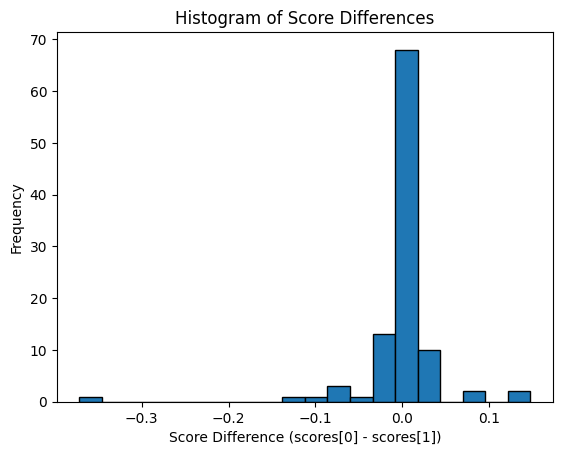

In [62]:
def plot_histogram():
    # Plot histogram
    plt.hist(score_differences, bins=20, edgecolor='black')  # Adjust bins as needed
    plt.xlabel('Score Difference (scores[0] - scores[1])')
    plt.ylabel('Frequency')
    plt.title('Histogram of Score Differences')
    plt.show()

plot_histogram()

In [64]:
def analyze(score_array, threshold = 0.05):
    total_scores = [0, 0]
    wins = [0, 0, 0]
    wins_above_threshold = [0, 0, 0]
    highest_possible_score = 0 # assume we always take the best one

    n = len(score_array)

    for i in range(n):
        score0 = score_array[i].scores[0]
        score1 = score_array[i].scores[1]
        diff = score0 - score1

        total_scores[0] += score0
        total_scores[1] += score1

        if diff > 0:
            wins[0] +=1
            highest_possible_score += score0
        elif diff < 0:
            wins[1] +=1
            highest_possible_score += score1
        else:
            wins[2] +=1
            highest_possible_score += score0

        if diff > threshold:
            wins_above_threshold[0] +=1
        elif diff < -threshold:
            wins_above_threshold[1] +=1
        else:
            wins_above_threshold[2] +=1

    average_scores = [total_scores[0]/n, total_scores[1]/n]
    highest_possible_average = highest_possible_score / n
    print(average_scores)
    print(highest_possible_average)
    print(wins)
    print(wins_above_threshold)

analyze(outputs_array, 0.05)

[0.8219719876845678, 0.8243805523596558]
0.832820056700239
[46, 42, 14]
[4, 6, 92]


In [66]:
# does score similarity to each other have a correlation with good translations?
score_averages = np.array([
    item.system_score
    for item in outputs_array
])
print(score_averages[:10])

[0.61132494 0.85013646 0.85793671 0.81291088 0.89024669 0.83138341
 0.59049359 0.882065   0.88000545 0.43133028]


In [68]:
# Extract the difference scores[0] - scores[1] for each object
max_scores = np.array([
    np.max([item.scores[0], item.scores[1]])
    for item in outputs_array
])

print(max_scores[:10])  # Preview first 10 to check

[0.61961824 0.85013646 0.85842735 0.85029823 0.89434856 0.84236318
 0.64651716 0.88382399 0.88139063 0.43633059]


In [71]:
for i in range(len(abs_score_differences)):
    if (abs_score_differences[i] > 0.1):
        print(numpy_array[i])
        print(outputs_array[i])

[9 'eng_to_spa' 'you run' 'tu corres' 'tú corres' 2 '2024-11-26 21:29:20']
Prediction([('scores', [0.5344700217247009, 0.6465171575546265]), ('system_score', 0.5904935896396637)])
[16 'eng_to_spa' 'It’s raining cats and dogs' 'Lueve a cántaros'
 'Está lloviendo a cántaros.' 2 '2025-01-02 16:03:46']
Prediction([('scores', [0.2837666869163513, 0.40278467535972595]), ('system_score', 0.34327568113803864)])
[18 'eng_to_spa' 'let it snow' 'Deja que nieve' 'que nieve' 3
 '2025-01-02 23:01:33']
Prediction([('scores', [0.8552071452140808, 0.7079418301582336]), ('system_score', 0.7815744876861572)])
[28 'eng_to_spa' 'What goes around comes around.'
 'Lo que se siembra de recoge.' 'Lo que va, vuelve.' 3
 '2025-01-06 20:30:32']
Prediction([('scores', [0.38267096877098083, 0.7542791962623596]), ('system_score', 0.5684750825166702)])
[30 'eng_to_spa' "Dad wasn't home so I got the whole nine yards from Mom."
 'Papá no estaba en casa, así que mamá me dio toda la información que necesité.'
 'Papá no e

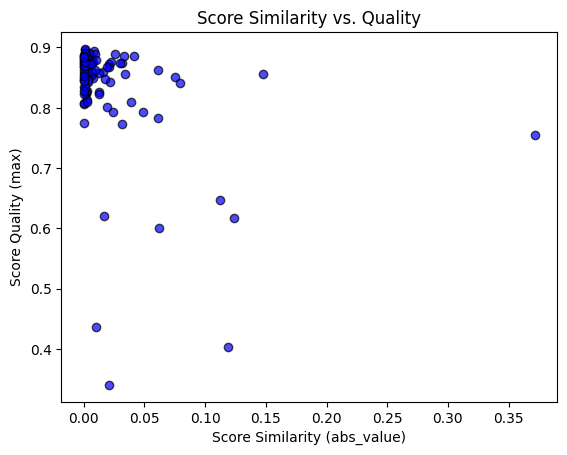

In [72]:
# Scatter plot
plt.scatter(abs_score_differences, max_scores, color='blue', alpha=0.7, edgecolor='k')

# Labels and title
plt.xlabel('Score Similarity (abs_value)')
plt.ylabel('Score Quality (max)')
plt.title('Score Similarity vs. Quality')

# Show plot
plt.show()

In [73]:
def analyze(score_array, threshold = 0.05):
    total_scores = [0, 0]
    wins = [0, 0, 0]
    wins_above_threshold = [0, 0, 0]
    highest_possible_score = 0 # assume we always take the best one

    n = len(score_array)

    for i in range(n):
        score0 = score_array[i].scores[0]
        score1 = score_array[i].scores[1]
        diff = score0 - score1

        total_scores[0] += score0
        total_scores[1] += score1

        if diff > 0:
            wins[0] +=1
            highest_possible_score += score0
        elif diff < 0:
            wins[1] +=1
            highest_possible_score += score1
        else:
            wins[2] +=1
            highest_possible_score += score0

        if diff > threshold:
            wins_above_threshold[0] +=1
        elif diff < -threshold:
            wins_above_threshold[1] +=1
        else:
            wins_above_threshold[2] +=1

    average_scores = [total_scores[0]/n, total_scores[1]/n]
    highest_possible_average = highest_possible_score / n
    print(average_scores)
    print(highest_possible_average)
    print(wins)
    print(wins_above_threshold)

analyze(outputs_array, 0.05)

[0.8219719876845678, 0.8243805523596558]
0.832820056700239
[46, 42, 14]
[4, 6, 92]
